<a href="https://colab.research.google.com/github/joan1011/Basic-Image-processing-steps-using-opencv-and-python/blob/master/opencv_resizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Resize Image ( cv2.resize )



### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-resizing/opencv-resizing.zip
!unzip -qq opencv-resizing.zip
%cd opencv-resizing

--2021-05-25 18:10:39--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-resizing/opencv-resizing.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.128.170
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.128.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82969 (81K) [application/zip]
Saving to: ‘opencv-resizing.zip’

opencv-resizing.zip 100%[===================>]  81.02K   492KB/s    in 0.2s    

2021-05-25 18:10:39 (492 KB/s) - ‘opencv-resizing.zip’ saved [82969/82969]

/content/opencv-resizing


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing basic image resizing with OpenCV

In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="adrian.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "Anand.png"
}

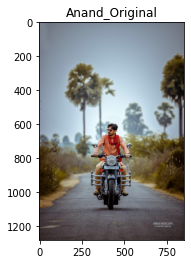

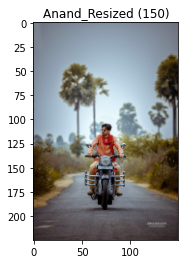

In [6]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Anand_Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Anand_Resized (150)", resized)

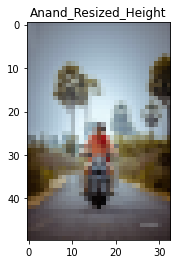

In [9]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Anand_Resized_Height", resized)

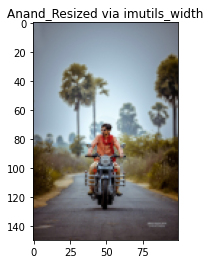

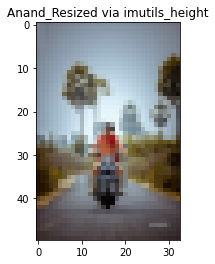

In [12]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Anand_Resized via imutils_width", resized)
resized = imutils.resize(image, height=50)
plt_imshow("Anand_Resized via imutils_height", resized)

### Comparing OpenCV interpolation methods


[INFO] cv2.INTER_NEAREST


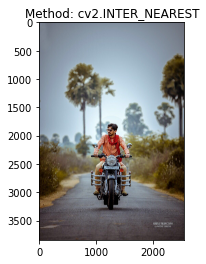

[INFO] cv2.INTER_LINEAR


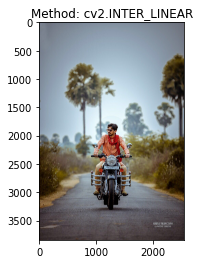

[INFO] cv2.INTER_AREA


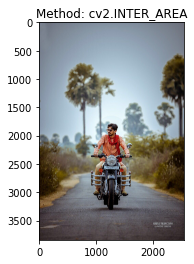

[INFO] cv2.INTER_CUBIC


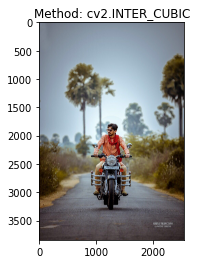

[INFO] cv2.INTER_LANCZOS4


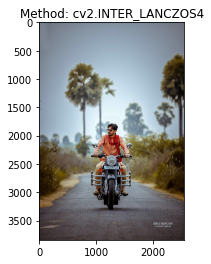

In [13]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)